# DATA ANALYSIS ON NETFLIX TOP 10 DATASET

We are going to analyse the Netflix Top 10 Dataset in terms of its Viewership Score to figure out if we can com up with any valuable insights regarding the programs aired and the durability of a program in top 10 list.

In [4]:
# importing requried libraries :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
# import csv file
df = df.to_csv('C:\\Users\\pranj\\Downloads\\Data Science\\New folder\\output.csv'), encoding= 'unicode_escape')
#View few rows
df.head()

SyntaxError: cannot assign to function call (51862554.py, line 2)

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.info()

# DATA CLEANING

In [10]:
#changing the data type of columns for better analysis
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])
df['As of'] = pd.to_datetime(df['As of'])

In [11]:
#taking the total of null values in each column
df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [12]:
#checking a specific column
column_data = df['Netflix Exclusive']
column_data.head()

0    Yes
1    Yes
2    NaN
3    NaN
4    Yes
Name: Netflix Exclusive, dtype: object

In [13]:
#Replacing null values in the column Netflix exclusive with 'No'
df['Netflix Exclusive'] = df['Netflix Exclusive'].fillna('No')

In [14]:
#Replacing '-' with '0' for column named 'Year to Date Rank'
df['Year to Date Rank'] = df['Year to Date Rank'].replace('-', 0)

In [15]:
#Replacing '-' with '0' for column named 'Last Week Rank'
df['Last Week Rank'] = df['Last Week Rank'].replace('-', 0)

In [16]:
#Viewing the table to make sure the chages are made
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem â¦",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,0,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,No,2019-03-28,9,76
3,2020-04-01,4,4,0,Blood Father,Movie,No,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55


# EDA AND VISUALISATION

In [17]:
#To view all columns in the table
df.columns

Index(['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Netflix Exclusive', 'Netflix Release Date', 'Days In Top 10',
       'Viewership Score'],
      dtype='object')

Let us find out if there is relation between the viewership score and days in top 10.

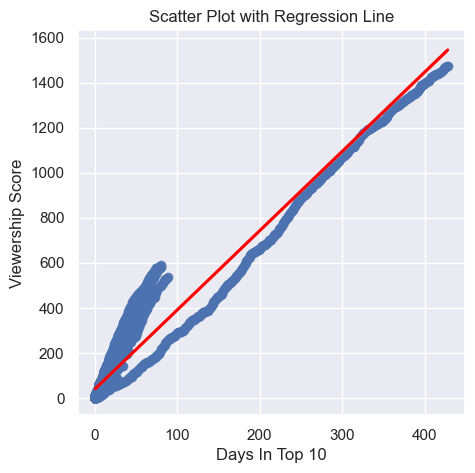

In [18]:
# Create a scatter plot with a black and red regression line
plt.figure(figsize=(5,5))
sns.set_theme(style='darkgrid', palette='deep')
sns.regplot(data=df, x='Days In Top 10', y='Viewership Score', line_kws={'color': 'red'})

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Days In Top 10')
plt.ylabel('Viewership Score')

plt.show()

In [19]:
# cheching the score for correlation coefficient.

dd=np.corrcoef(df['Viewership Score'],df['Days In Top 10'])
dd[1, 0]

0.9624135870948404

In [20]:
df.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


** Here we can see that the maximum day a show/movie has stayed in top 10 is 428 and minimum is as low as 1 day.
   But we find that the average day a program stayed in top 10 is 24.
   Clearly stating there are huge non-uniform interest in the program list of Netflix.
   The maximum viewership score for a program is as high as 1474 and minimum is 1.
   



In [21]:
#Figuring out the start date
start = pd.to_datetime(df['As of']).dt.date.min()
print(start)

2020-04-01


In [22]:
#Figuring out the end date
end = pd.to_datetime(df['As of']).dt.date.max()
print(end)

2022-03-11


**The given Ranking is for a span of almost two year between year 2020 - 2022. Now lets find out the release date of various programs in the dataset.

In [23]:
df['Release_year'] = df['Netflix Release Date'].dt.year
df.Release_year.value_counts()[0:11]

2020    2881
2021    2538
2019     417
2018     353
2022     340
2017     280
2016     120
2015      96
2014      67
2013       7
2007       1
Name: Release_year, dtype: int64

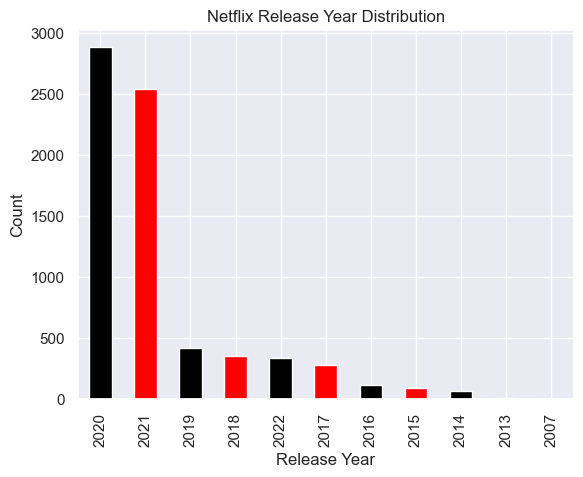

In [24]:
df['Netflix Release Date'].dt.year.value_counts().plot(kind='bar', color=['black', 'red'])

# Customize the plot
plt.title('Netflix Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')

plt.show()

**The data set contain majority of shows released in the year of 2020 followed by 2021 and least from 2007.

Lets find out if all the programs are exclusive to Netflix or if available in other platforms.

In [25]:
#To find out the number of exclusive shows and sponsored ones
df['Netflix Exclusive'].value_counts()

Yes    4599
No     2501
Name: Netflix Exclusive, dtype: int64

In [26]:
Netflix_exclusive = {'yes':[4599], 'No':[2501]} 
Netflix_exclusive1 = pd.DataFrame(Netflix_exclusive)

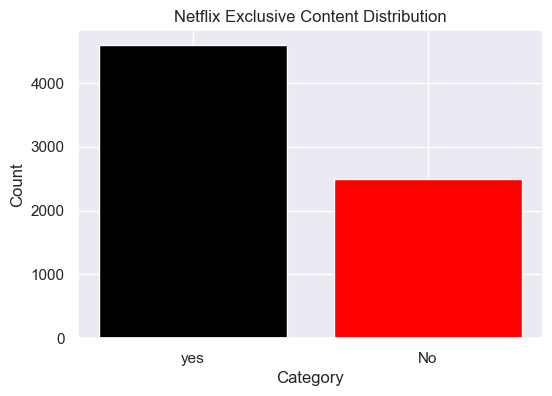

In [27]:
# Create a bar chart with custom colors
plt.figure(figsize=(6, 4))
plt.bar(Netflix_exclusive1.columns, Netflix_exclusive1.values[0], color=['black', 'red'])
plt.title('Netflix Exclusive Content Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.show()

** We can see that 4000+ shows aired in exclusive to the platform. Only around 2500 shows are non-Exclusive ones.

Let us focus on the category 'Movies' to see how many such are netflix exclusives

In [28]:
#To find out the types of shows in the given dataset
df['Type'].value_counts()

TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perfâ¦       2
Name: Type, dtype: int64

In [29]:
ntype = {'TV Show':[4446], 'Movie':[2611], 'Stand-Up Comedy':[41],'Concert/Perfomance':[2]} 
ntype1 = pd.DataFrame(ntype)

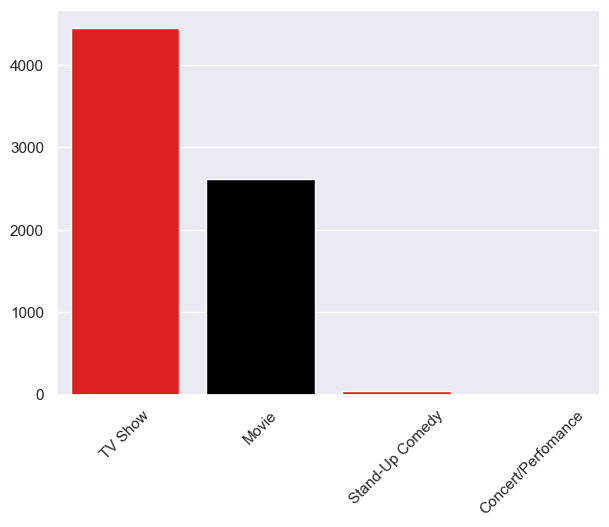

In [30]:
plt.figure(figsize=(7, 5))
sns.barplot(data=ntype1, palette = ['red', 'black'])
plt.xticks(rotation=45);

**TV shows are the main kind of programs prefered on the Netflix platform, to be followed by Movies and programs like Stand up comedies and concerts are least prefered

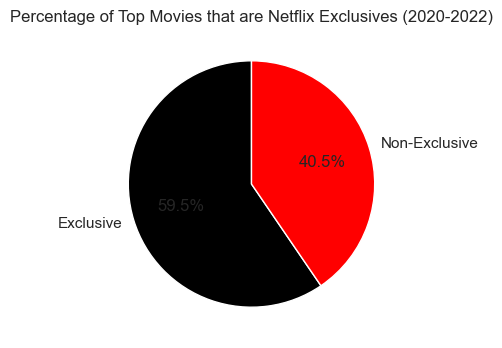

Percentage of top Movies that are Netflix exclusives: 59.53%


In [31]:
# Filter the dataset to include only 'Movies' and the years 2020-2022
movies_data = df[(df['Type'] == 'Movie') & (df['Release_year'] >= 2020) & (df['Release_year'] <= 2022)]

# Calculate the total number of top Movies during this period
total_movies = len(movies_data)

# Calculate the number of Netflix exclusive Movies among the top Movies
exclusive_movies = len(movies_data[movies_data['Netflix Exclusive'] == 'Yes'])

# Calculate the percentage of exclusive Movies
percentage_exclusive = (exclusive_movies / total_movies) * 100

# Create a pie chart to visualize the percentage of exclusive vs. non-exclusive top Movies
labels = ['Exclusive', 'Non-Exclusive']
sizes = [percentage_exclusive, 100 - percentage_exclusive]
colors = ['black', 'red']  # You can customize the colors as needed

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Top Movies that are Netflix Exclusives (2020-2022)')
plt.show()

# Print the calculated percentage
print(f"Percentage of top Movies that are Netflix exclusives: {percentage_exclusive:.2f}%")

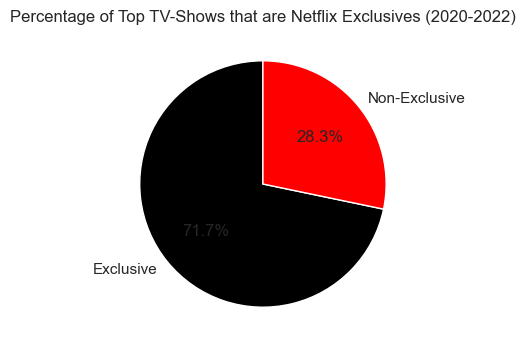

Percentage of top TV Shows that are Netflix exclusives: 71.73%


In [32]:
# Filter the dataset to include only 'Shows' and the years 2020-2022
show_data = df[(df['Type'] == 'TV Show') & (df['Release_year'] >= 2020) & (df['Release_year'] <= 2022)]

# Calculate the total number of top shows during this period
total_show = len(show_data)

# Calculate the number of Netflix exclusive Shows among the top Movies
exclusive_show = len(show_data[show_data['Netflix Exclusive'] == 'Yes'])

# Calculate the percentage of exclusive Shows
percentage_exclusive = (exclusive_show/ total_show) * 100

# Create a pie chart to visualize the percentage of exclusive vs. non-exclusive top Tv Shows
labels = ['Exclusive', 'Non-Exclusive']
sizes = [percentage_exclusive, 100 - percentage_exclusive]
colors = ['black', 'red']  # You can customize the colors as needed

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Top TV-Shows that are Netflix Exclusives (2020-2022)')
plt.show()

# Print the calculated percentage
print(f"Percentage of top TV Shows that are Netflix exclusives: {percentage_exclusive:.2f}%")

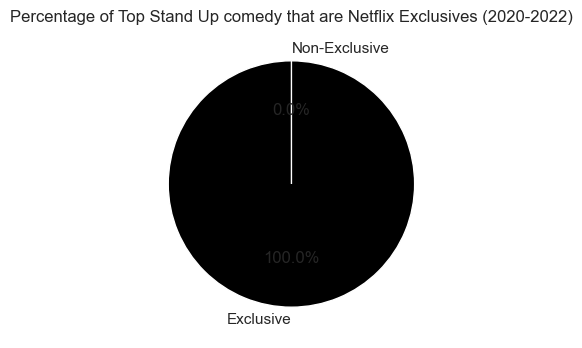

Percentage of top stand up comedy that are Netflix exclusives: 100.00%


In [33]:
# Filter the dataset to include only 'Stand up comedy' and the years 2020-2022
comedy_data = df[(df['Type'] == 'Stand-Up Comedy') & (df['Release_year'] >= 2020) & (df['Release_year'] <= 2022)]

# Calculate the total number of top shows during this period
total_comedy= len(comedy_data)

# Calculate the number of Netflix exclusive Shows among the top Movies
exclusive_comedy = len(comedy_data[comedy_data['Netflix Exclusive'] == 'Yes'])

# Calculate the percentage of exclusive Shows
percentage_exclusive = (exclusive_comedy/ total_comedy) * 100

# Create a pie chart to visualize the percentage of exclusive vs. non-exclusive top Tv Shows
labels = ['Exclusive', 'Non-Exclusive']
sizes = [percentage_exclusive, 100 - percentage_exclusive]
colors = ['black', 'red']  # You can customize the colors as needed

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Top Stand Up comedy that are Netflix Exclusives (2020-2022)')
plt.show()

# Print the calculated percentage
print(f"Percentage of top stand up comedy that are Netflix exclusives: {percentage_exclusive:.2f}%")

We can see that there are no netflix exclusive Stand Up comedy in the platform.

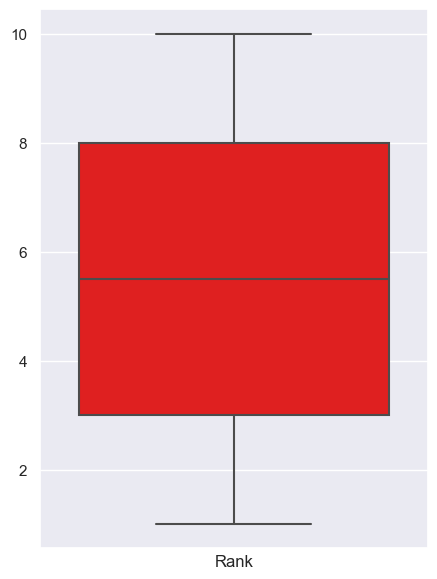

In [34]:
#Let's find out the Rank distribution among the programs aired
plt.figure(figsize=(5, 7))
sns.boxplot(data=df['Rank'], color='red')
plt.xticks([])  # This line removes the x-axis ticks
plt.xlabel('Rank')
plt.show()

We can see that almost an equal distribution of ranks (0-10) among the programs in the dataset

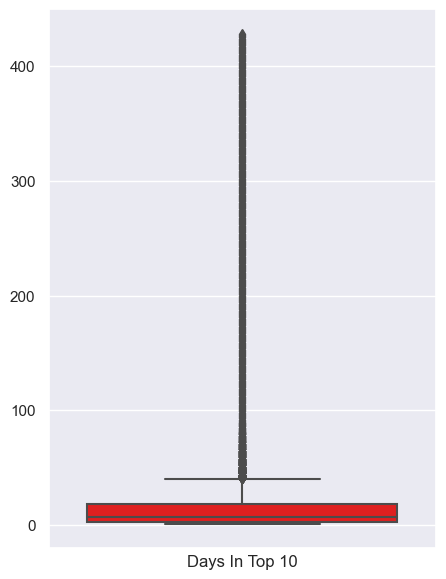

In [35]:
color2 ='red'
plt.figure(figsize=(5, 7))
sns.boxplot(data=df['Days In Top 10'],color=color2)
plt.xticks(ticks=[])
plt.xlabel('Days In Top 10');

**This shows that very few programs/shows manage to stay in top 10 for more than a week.Even though it has stayed as long as 400+ days.


This shows the huge popularity of some shows. Lets further analyse to find more on this based on the viewership scores.

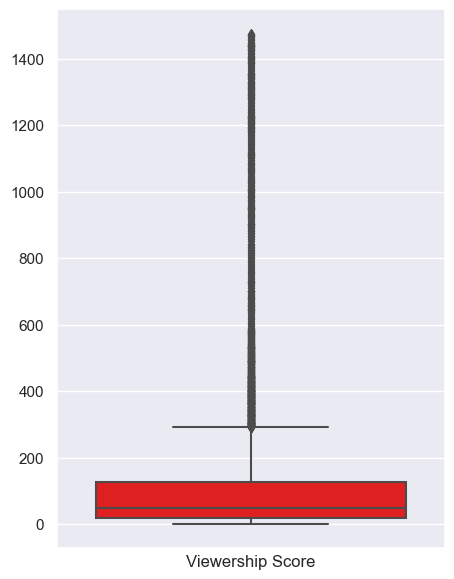

In [36]:
color3 = 'red'
plt.figure(figsize=(5, 7))
sns.boxplot(data=df['Viewership Score'], color=color3)
plt.xticks(ticks=[])
plt.xlabel('Viewership Score');

The viewership score was as high as 1400+ for some shows but majority shows has a viewership score between 20 - 150. 

Lets analyse the outlier or the program that leads to such variation in viewership scores. 

In [37]:
df[df['Days In Top 10'] >= 100] #outliers

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,Release_year
2886,2021-01-14,7,6,8,Cocomelon,TV Show,No,2020-06-01,100,287,2020
2896,2021-01-15,7,7,10,Cocomelon,TV Show,No,2020-06-01,101,291,2020
2909,2021-01-16,10,7,9,Cocomelon,TV Show,No,2020-06-01,102,292,2020
2919,2021-01-17,10,10,9,Cocomelon,TV Show,No,2020-06-01,103,293,2020
3019,2021-01-27,10,0,0,Cocomelon,TV Show,No,2020-06-01,104,294,2020
...,...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,0,Cocomelon,TV Show,No,2020-06-01,424,1466,2020
6687,2022-01-29,8,5,8,Cocomelon,TV Show,No,2020-06-01,425,1469,2020
6718,2022-02-01,9,0,7,Cocomelon,TV Show,No,2020-06-01,426,1471,2020
6959,2022-02-25,10,0,0,Cocomelon,TV Show,No,2020-06-01,427,1472,2020


In [38]:
df.Title.value_counts()

Cocomelon                         428
Ozark                              85
Cobra Kai                          81
Manifest                           80
The QueenÃ¢ÂÂs Gambit            73
                                 ... 
The Office                          1
Animals on the Loose: A Youâ¦      1
Dark                                1
The Secret Life of Pets 2           1
Step Up Revolution                  1
Name: Title, Length: 645, dtype: int64

**We can see the higher viewership scores are for TV Shows ranging from around 125 - 260 whereas the viewership score for movies stays between 20-60, clearly showing a higher viewing interest towards shows rather than movies.

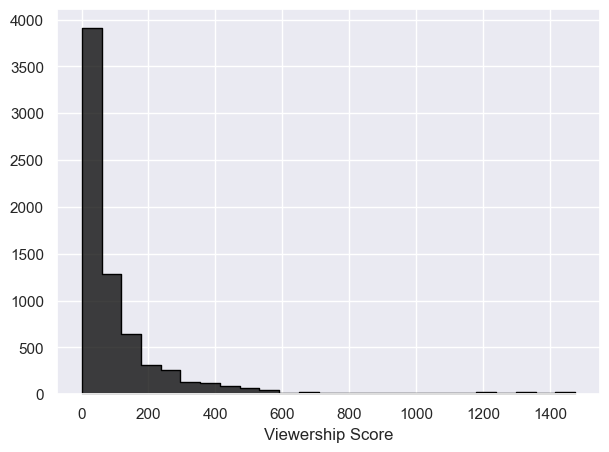

In [39]:
plt.figure(figsize=(7, 5))
sns.histplot(df['Viewership Score'], bins=25, element='step', color='black')
plt.ylabel(ylabel=''); 

**Here upon plotting the viewership we can see that highest number of programs have been rated between 0-50 and only programs as low as 1 has been rated above 1400

In [40]:
average_scores_by_year = movies_data.groupby('Release_year')['Viewership Score'].mean()
average_scores_by_year

Release_year
2020    38.628937
2021    42.154874
2022    28.570513
Name: Viewership Score, dtype: float64

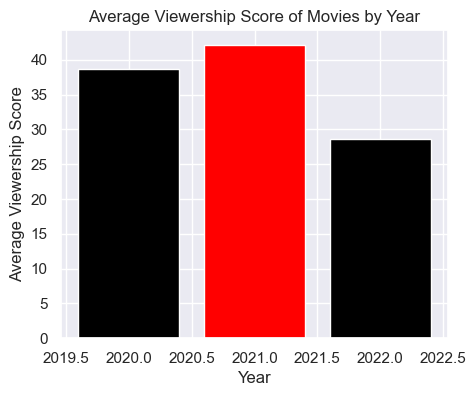

In [41]:
plt.figure(figsize=(5, 4))
plt.bar(average_scores_by_year.index, average_scores_by_year,color=['black', 'red'])
plt.xlabel('Year')
plt.ylabel('Average Viewership Score')
plt.title('Average Viewership Score of Movies by Year')
plt.show()

The viewership score has been highest in the year 2021 showing a higher traffic in the Platform in that year

In [42]:
filtered_data = df[(df['Release_year'] >= 2020) & (df['Release_year'] <= 2022) & (df['Type'] =='Movie')]
top_10_movie = filtered_data.nlargest(10, 'Viewership Score')
top_10_movie 

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,Release_year
959,2020-07-05,10,10,4,365 Days,Movie,Yes,2020-07-07,28,213,2020
949,2020-07-04,10,9,3,365 Days,Movie,Yes,2020-07-07,27,212,2020
938,2020-07-03,9,7,3,365 Days,Movie,Yes,2020-07-07,26,211,2020
926,2020-07-02,7,5,4,365 Days,Movie,Yes,2020-07-07,25,209,2020
914,2020-07-01,5,3,4,365 Days,Movie,Yes,2020-07-07,24,205,2020
4258,2021-05-31,9,9,6,The Mitchells vs. The Machines,Movie,Yes,2021-04-30,31,204,2021
4248,2021-05-30,9,10,5,The Mitchells vs. The Machines,Movie,Yes,2021-04-30,30,202,2021
4239,2021-05-29,10,7,6,The Mitchells vs. The Machines,Movie,Yes,2021-04-30,29,200,2021
902,2020-06-30,3,3,3,365 Days,Movie,Yes,2020-07-07,23,199,2020
4226,2021-05-28,7,7,8,The Mitchells vs. The Machines,Movie,Yes,2021-04-30,28,199,2021


<AxesSubplot:xlabel='Title', ylabel='Viewership Score'>

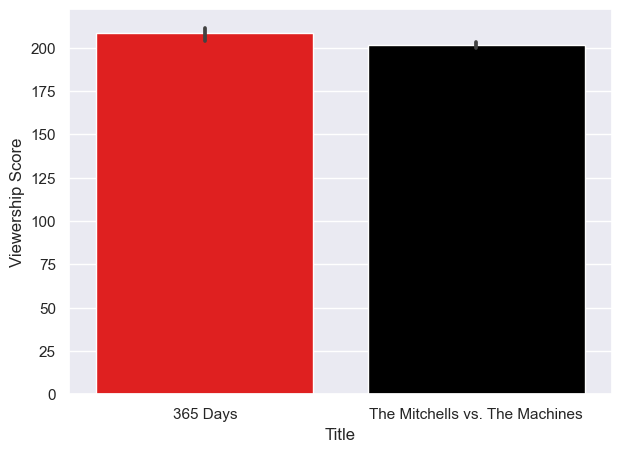

In [43]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(data = top_10_movie, x = 'Title',y= 'Viewership Score',palette = ['red', 'black']
)

The highest viewership score for Movies is around 210 for the movie '365 Days' and 200 for Movie 'The Mitchells vs The Machines'

The Overall Viewership scores for top 10 programs for the 2 years span 


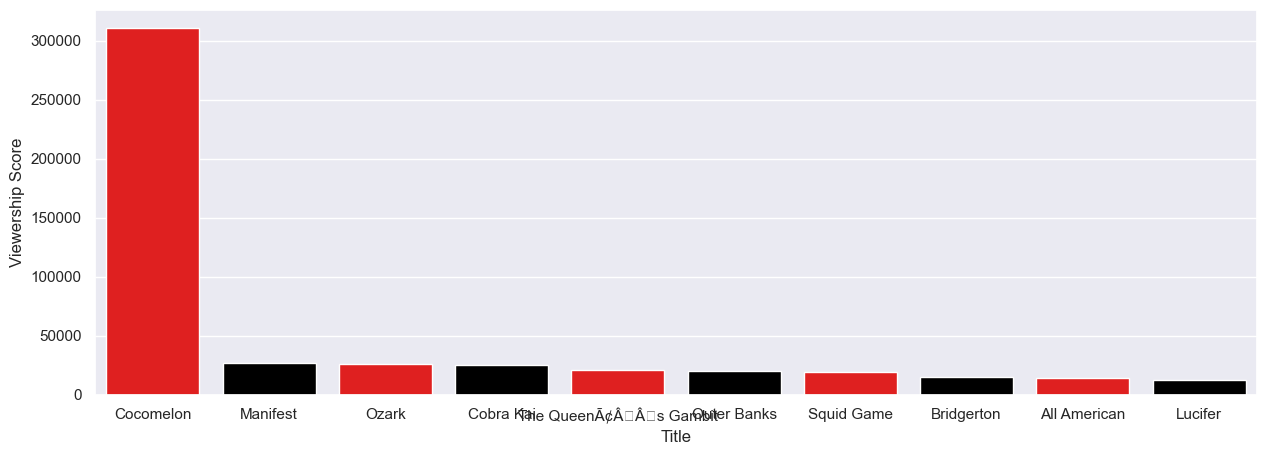

In [44]:
# Top 10 by viewership score

sales_state = df.groupby(['Title'], as_index=False)['Viewership Score'].sum().sort_values(by='Viewership Score', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'Title',y= 'Viewership Score',palette = ['red', 'black'])
print("The Overall Viewership scores for top 10 programs for the 2 years span ")

In [45]:
df[df['Viewership Score'] == df['Viewership Score'].max()]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,Release_year
6998,2022-03-01,9,0,0,Cocomelon,TV Show,No,2020-06-01,428,1474,2020


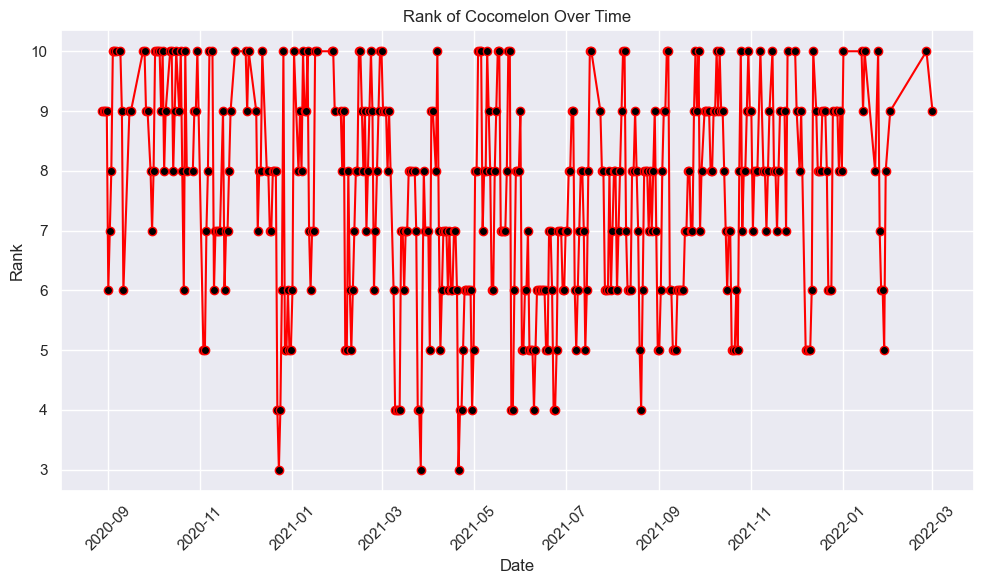

In [46]:
# Filter the data for 'Cocomelon'
cocomelon_data = df[df['Title'] == 'Cocomelon']

# Create a line plot for the rank of 'Cocomelon' over time
plt.figure(figsize=(10, 6))
plt.plot(cocomelon_data['As of'], cocomelon_data['Rank'], marker='o', linestyle='-', color='red', markerfacecolor='black')
plt.title('Rank of Cocomelon Over Time')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# INFERENCES

The netflix dataset has been analysed and inferences were figured out.

We can see that the most Netflix exclusives are TV shows, Followed by Movies with Zero Exclusive Stand-Up comedy Content.

Most programs aired in the platform has not managed to stay in the Top 10 for long, the average day a program managed to stay in the top 10 list was for 24 days, but a program called 'cocomelon' has managed to stay in the list for as long as 428 days with the highest viewership score of 1428 but it has managed to grab rank between 7-10 mostly. 


The huge popularity and viewership score of the program shows the high reach of the genre it belongs to even though its not a Netflix Exclusive. Bringing more worthy content of the same genre can grab more view for the netflix platform.